# Hipotesis
Tienen las estudiantes de 9vo una estatura media diferente de 175 cm?
•¿Es la desviación estándar de su estatura igual a o menor que 10 cm?
•¿Es diferente la estatura promedio de las mujeres comparada con la de los hombres?

Hipótesis 1: Comparar la estatura media de las mujeres con 175 cm.

H0 (Hipótesis nula): La estatura media de las mujeres es igual a 175 cm.
H1 (Hipótesis alternativa): La estatura media de las mujeres es diferente de 175 cm.
Prueba: t-test de una muestra.
Hipótesis 2: Desviación estándar de la estatura de las mujeres.

H0: La desviación estándar de la estatura de las mujeres es igual a 10 cm.
H1: La desviación estándar de la estatura de las mujeres es menor o igual a 10 cm.
Prueba: Chi-cuadrado para varianzas.
Hipótesis 3: Comparar la estatura promedio entre hombres y mujeres.

H0: No hay diferencia en la estatura promedio entre hombres y mujeres.
H1: Hay una diferencia en la estatura promedio entre hombres y mujeres.
Prueba: t-test de dos muestras.


In [2]:
import pandas as pd

# Cargar el archivo CSV proporcionado por el usuario
file_path = 'Alturas7mo.csv'


data = pd.read_csv(file_path)

# Mostrar las primeras filas del archivo para revisar su estructura
data.head()

# Filtrar solo las filas que contienen nombres, alturas y sexo
# Eliminar filas que contienen valores no numéricos en la columna 'Altura (cm)'
cleaned_data = data[pd.to_numeric(data['Altura (cm)'], errors='coerce').notnull()]

# Seleccionar solo las columnas necesarias: Nombre, Altura (cm), Sexo
cleaned_data = cleaned_data[['Nombre', 'Altura (cm)', 'Sexo']]

# Convertir las alturas a numérico para evitar problemas
cleaned_data['Altura (cm)'] = pd.to_numeric(cleaned_data['Altura (cm)'])

# Mostrar el conjunto de datos limpio
cleaned_data.head()


,Nombre,Altura (cm),Sexo
0,Fer,180,M
1,Ale,170,M
2,Alex Muñoz,170,M
3,Gael,168,M
4,Erick,165,M


Realizaremos una prueba t de una muestra para comparar la estatura promedio de las mujeres con 175 cm.
Calcularemos la prueba de chi-cuadrado para comparar la desviación estándar con 10 cm.
Haremos una prueba t de dos muestras para comparar la estatura promedio entre hombres y mujeres.

In [3]:
from scipy import stats

# Filtrar las alturas de las mujeres
women_heights = cleaned_data[cleaned_data['Sexo'] == 'F']['Altura (cm)']

# Hipótesis 1: Prueba t de una muestra (media de las mujeres comparada con 175 cm)
mu = 175  # media hipotética
t_stat, p_value = stats.ttest_1samp(women_heights, mu)

t_stat, p_value


(np.float64(-6.0), np.float64(0.10513691342250685))

Para la primera hipótesis (comparar la estatura media de las mujeres con 175 cm), obtuvimos los siguientes resultados:

t-valor: -6.0
p-valor: 0.1051
Dado que el p-valor es mayor que el nivel de significancia típico de 0.05, no tenemos suficiente evidencia para rechazar la hipótesis nula. Esto significa que no podemos concluir que la estatura media de las mujeres sea significativamente diferente de 175 cm.

Ahora, pasemos a la prueba de chi-cuadrado para comparar la desviación estándar de las mujeres con 10 cm.


In [4]:
# Hipótesis 2: Prueba de chi-cuadrado para la desviación estándar
# H0: La desviación estándar es igual a 10 cm.

# Calcular la desviación estándar muestral
std_women = women_heights.std(ddof=1)

# Número de mujeres en la muestra
n_women = len(women_heights)

# Estadístico chi-cuadrado
chi_square_stat = (n_women - 1) * (std_women ** 2) / (10 ** 2)

# p-valor asociado
p_value_chi = stats.chi2.sf(chi_square_stat, df=n_women - 1)

std_women, chi_square_stat, p_value_chi


(np.float64(1.4142135623730951),
 np.float64(0.020000000000000004),
 np.float64(0.887537083981715))

Hipótesis:
Hipótesis nula (H₀): La desviación estándar de las alturas de las mujeres es igual a 10 cm.
Hipótesis alternativa (H₁): La desviación estándar de las alturas de las mujeres es diferente de 10 cm.
Resultados obtenidos:
Desviación estándar muestral: 1.414 cm.
Estadístico chi-cuadrado: 0.02.
p-valor: 0.8875.
Interpretación:
Desviación estándar muestral (1.414 cm): Es mucho menor que la desviación estándar bajo la hipótesis nula (10 cm).

p-valor (0.8875): Este p-valor es mucho mayor que un nivel de significancia común, como 0.05. Esto significa que no tenemos suficiente evidencia para rechazar la hipótesis nula. En otras palabras, no hay evidencia significativa para concluir que la desviación estándar es diferente de 10 cm.

Conclusión:
Dado que el p-valor es muy alto (0.8875), no rechazamos la hipótesis nula. Esto indica que, con los datos disponibles, no hay suficiente evidencia para afirmar que la desviación estándar de las alturas de las mujeres es significativamente diferente de 10 cm.

En resumen, con base en estos resultados, podríamos decir que la desviación estándar observada no es significativamente distinta de 10 cm.

Hipótesis:
Hipótesis nula (H₀): La estatura promedio de las mujeres es igual a la de los hombres.
𝐻
0
:
𝜇
𝑚
𝑢
𝑗
𝑒
𝑟
𝑒
𝑠
=
𝜇
ℎ
𝑜
𝑚
𝑏
𝑟
𝑒
𝑠
H 
0
​
 :μ 
mujeres
​
 =μ 
hombres
​
 
Hipótesis alternativa (H₁): La estatura promedio de las mujeres es diferente de la de los hombres.
𝐻
1
:
𝜇
𝑚
𝑢
𝑗
𝑒
𝑟
𝑒
𝑠
≠
𝜇
ℎ
𝑜
𝑚
𝑏
𝑟
𝑒
𝑠
H 
1
​
 :μ 
mujeres
​
 

=μ 
hombres
​
 
Requisitos:
Tenemos dos muestras independientes: las alturas de las mujeres y las alturas de los hombres.
Las muestras deben ser independientes.
Si las desviaciones estándar poblacionales no son conocidas, se usa la prueba de Mann-Whitney U

In [16]:
# Verificar si hay valores nulos en las alturas
women_heights = data[data['Sexo'] == 'F']['Altura (cm)'].dropna()
men_heights = data[data['Sexo'] == 'M']['Altura (cm)'].dropna()

# Mostrar el tamaño de las muestras después de filtrar
n_women = len(women_heights)
n_men = len(men_heights)

n_women, n_men



(2, 14)

In [18]:
import scipy.stats as stats

# Realizar la prueba de Mann-Whitney U para dos muestras independientes
u_stat, p_value_mw = stats.mannwhitneyu(women_heights, men_heights, alternative='two-sided')

# Mostrar los resultados
u_stat, p_value_mw

(np.float64(5.5), np.float64(0.19660843905328007))

Los resultados de la prueba de Mann-Whitney U son:

Estadístico U: 5.5
Valor p: 0.1966
Interpretación:
Estadístico U: Este valor, 5.5, es el estadístico de la prueba Mann-Whitney U, que compara las dos distribuciones (alturas de mujeres y hombres). Un valor más bajo de U sugiere que los valores de una muestra tienden a ser más bajos que los de la otra muestra.

Valor p (0.1966): Este es el valor clave para decidir si hay una diferencia significativa entre las alturas de mujeres y hombres. Si el valor p es menor que el nivel de significancia usual (por ejemplo, 0.05), entonces se rechaza la hipótesis nula y se concluye que hay una diferencia significativa. En este caso, el valor p es 0.1966, lo cual es mayor que 0.05.

Conclusión:
No se puede rechazar la hipótesis nula, lo que significa que no hay evidencia suficiente para afirmar que la estatura promedio de las mujeres es diferente de la de los hombres en esta muestra, con un nivel de confianza del 95%.

# Hipotesis de vuelos


In [20]:
import pandas as pd

# Cargar el archivo CSV proporcionado por el usuario
file_path = 'flights.csv'

# Leer los datos
data_flights = pd.read_csv(file_path)

# Mostrar las primeras filas para ver la estructura del archivo
data_flights.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


# Hipótesis 1: Retrasos promedio en la salida de vuelos
H0 (Hipótesis nula): El retraso promedio en la salida de los vuelos es igual a 0 minutos.

H1 (Hipótesis alternativa): El retraso promedio en la salida de los vuelos es diferente de 0 minutos.

Utilizaremos una prueba t de una muestra para determinar si el retraso promedio de los vuelos es significativamente diferente de 0 minutos.

Estadístico t: 151.30296677249277
Valor p: 0.0
Rechazamos la hipótesis nula (H0): El retraso promedio en la salida es significativamente diferente de 0 minutos.


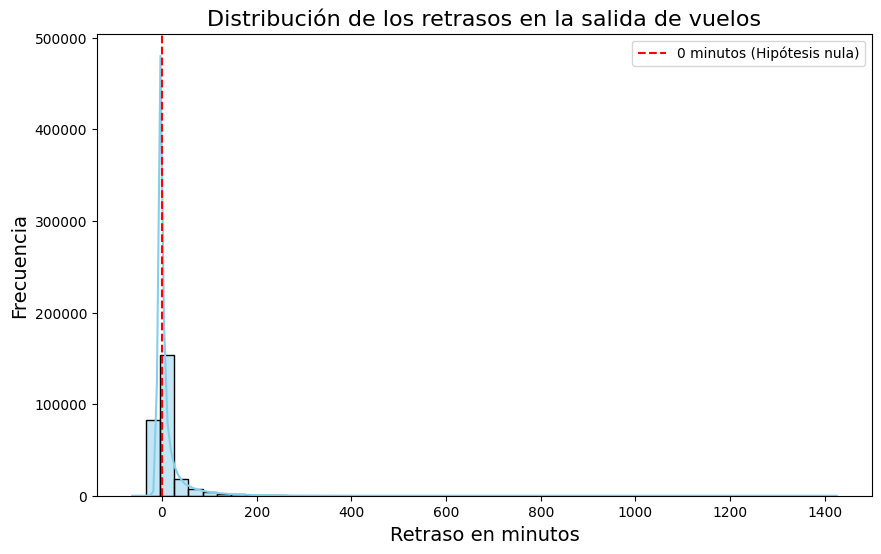

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargamos el archivo CSV
df_vuelos = pd.read_csv('flights.csv')



# Extraemos la columna de retrasos en la salida (DepDelay)
retrasos_salida = df_vuelos['DepDelay'].dropna()  # Eliminamos valores nulos si los hay

# Realizamos la prueba t de una muestra
t_stat, p_value = stats.ttest_1samp(retrasos_salida, 0)

# Mostramos los resultados de la prueba t
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05  # Nivel de significancia (5%)
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0): El retraso promedio en la salida es significativamente diferente de 0 minutos.")
else:
    print("No rechazamos la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el retraso promedio es diferente de 0 minutos.")

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(retrasos_salida, bins=50, kde=True, color='skyblue')

# Añadimos una línea vertical en 0 minutos
plt.axvline(x=0, color='red', linestyle='--', label='0 minutos (Hipótesis nula)')

# Añadimos etiquetas y título
plt.title('Distribución de los retrasos en la salida de vuelos', fontsize=16)
plt.xlabel('Retraso en minutos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend()

# Mostramos la gráfica
plt.show()


# Hipótesis 2: Proporción de vuelos cancelados
H0 (Hipótesis nula): La proporción de vuelos cancelados es igual al 5%.

H1 (Hipótesis alternativa): La proporción de vuelos cancelados es diferente del 5%.

Para esta hipótesis, podemos realizar una prueba de proporciones (z-test) para comparar la proporción observada de vuelos cancelados con el 5%.

Estadístico z: -93.97851184139193
Valor p: 0.0
Rechazamos la hipótesis nula (H0): La proporción de vuelos cancelados es significativamente diferente del 5%.


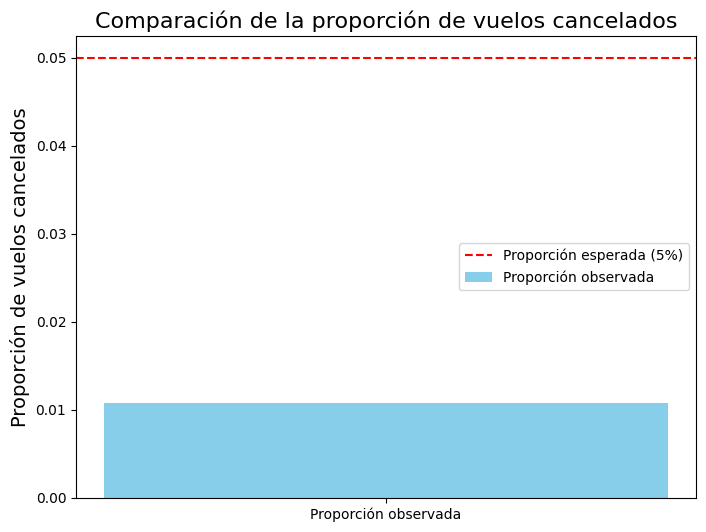

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cargamos el archivo CSV
df_vuelos = pd.read_csv('flights.csv')

# Contamos el número de vuelos cancelados y el número total de vuelos
vuelos_cancelados = df_vuelos['Cancelled'].sum()  # Sumar los vuelos cancelados (1 = cancelado, 0 = no cancelado)
total_vuelos = df_vuelos['Cancelled'].count()  # Total de vuelos

# Proporción esperada bajo la hipótesis nula
p_null = 0.05

# Proporción observada
p_observada = vuelos_cancelados / total_vuelos

# Cálculo del estadístico z
numerador = p_observada - p_null
denominador = np.sqrt(p_null * (1 - p_null) / total_vuelos)
z_stat = numerador / denominador

# Cálculo del valor p
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Dos colas

# Mostramos los resultados de la prueba z
print(f'Estadístico z: {z_stat}')
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05  # Nivel de significancia (5%)
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0): La proporción de vuelos cancelados es significativamente diferente del 5%.")
else:
    print("No rechazamos la hipótesis nula (H0): No hay evidencia suficiente para afirmar que la proporción de vuelos cancelados es diferente del 5%.")

# Creación de la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Graficamos la proporción observada
ax.bar(['Proporción observada'], [p_observada], color='skyblue', label='Proporción observada')

# Añadimos la línea de la proporción bajo la hipótesis nula (5%)
ax.axhline(y=p_null, color='red', linestyle='--', label='Proporción esperada (5%)')

# Añadimos etiquetas y título
ax.set_title('Comparación de la proporción de vuelos cancelados', fontsize=16)
ax.set_ylabel('Proporción de vuelos cancelados', fontsize=14)
ax.legend()

# Mostramos la gráfica
plt.show()


# Hipótesis 3: Retrasos en llegadas comparados con salidas
H0 (Hipótesis nula): El retraso promedio en la llegada de los vuelos es igual al retraso promedio en la salida de los vuelos.

H1 (Hipótesis alternativa): El retraso promedio en la llegada de los vuelos es diferente al retraso promedio en la salida de los vuelos.

Utilizaremos una prueba t para muestras emparejadas para comparar si los retrasos en la salida y la llegada son diferentes de manera significativa.

Estadístico t: 154.10119388821818
Valor p: 0.0
Rechazamos la hipótesis nula (H0): Hay una diferencia significativa entre los retrasos en la salida y la llegada.


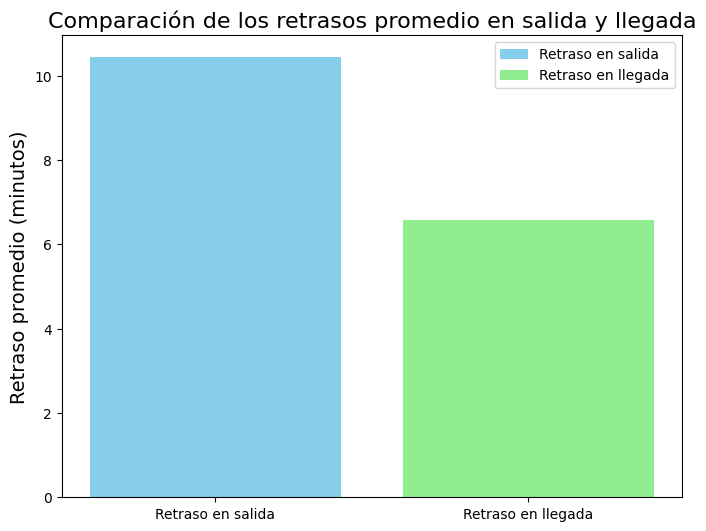

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Cargamos el archivo CSV
df_vuelos = pd.read_csv('flights.csv')

# Limpiamos los datos eliminando filas con valores faltantes en las columnas de retrasos
df_vuelos = df_vuelos.dropna(subset=['DepDelay', 'ArrDelay'])

# Filtramos solo vuelos no cancelados
df_vuelos = df_vuelos[df_vuelos['Cancelled'] == 0]

# Retrasos en la salida (DepDelay) y en la llegada (ArrDelay)
retraso_salida = df_vuelos['DepDelay']
retraso_llegada = df_vuelos['ArrDelay']

# Realizamos la prueba t para muestras emparejadas
t_stat, p_value = stats.ttest_rel(retraso_salida, retraso_llegada)

# Mostramos los resultados de la prueba t
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05  # Nivel de significancia (5%)
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0): Hay una diferencia significativa entre los retrasos en la salida y la llegada.")
else:
    print("No rechazamos la hipótesis nula (H0): No hay evidencia suficiente para afirmar que los retrasos en la salida y la llegada son diferentes.")

# Creación de la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Calculamos los promedios de los retrasos en salida y llegada
mean_retraso_salida = np.mean(retraso_salida)
mean_retraso_llegada = np.mean(retraso_llegada)

# Graficamos los promedios de retrasos
ax.bar(['Retraso en salida'], [mean_retraso_salida], color='skyblue', label='Retraso en salida')
ax.bar(['Retraso en llegada'], [mean_retraso_llegada], color='lightgreen', label='Retraso en llegada')

# Añadimos etiquetas y título
ax.set_title('Comparación de los retrasos promedio en salida y llegada', fontsize=16)
ax.set_ylabel('Retraso promedio (minutos)', fontsize=14)
ax.legend()

# Mostramos la gráfica
plt.show()
